## Transfer Learning

In [1]:
import os

In [4]:
model_name="digit_classifier_2021_09_12_13_06_06_.h5"

In [6]:
model_path=os.path.join('SAVED_MODELS',model_name)

In [7]:
model_path

'SAVED_MODELS\\digit_classifier_2021_09_12_13_06_06_.h5'

In [8]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
mnist=tf.keras.datasets.mnist

In [10]:
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

In [11]:
X_valid,X_train=X_train_full[:5000]/255.,X_train_full[5000:]/255.
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

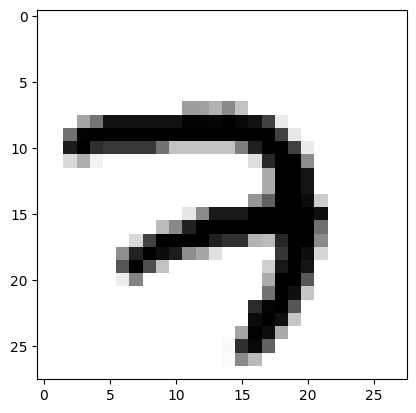

In [12]:
plt.imshow(X_train[0],cmap="binary")
plt.show()

## Loading already trained model

In [13]:
pretrained_model=tf.keras.models.load_model(model_path)

In [14]:
pretrained_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenLayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
hiddenLayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
outputLayer (Dense)          (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [21]:
for layer in pretrained_model.layers:
    print(f"{layer.name}: {layer.trainable}")

inputLayer: False
hiddenLayer1: False
hiddenLayer2: False
outputLayer: True


In [18]:
## We will make non trainable all layer expect output layer

In [20]:
for layer in pretrained_model.layers[:-1]:
    layer.trainable=False
    print(f"{layer.name}: {layer.trainable}")

inputLayer: False
hiddenLayer1: False
hiddenLayer2: False


In [22]:
lower_pretrained_layer=pretrained_model.layers[:-1]

In [23]:
lower_pretrained_layer

In [24]:
new_model=tf.keras.models.Sequential(
    lower_pretrained_layer)
    

In [25]:
new_model.add(tf.keras.layers.Dense(2,activation="softmax"))

In [26]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenLayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
hiddenLayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
dense (Dense)                (None, 2)                 202       
Total params: 265,802
Trainable params: 202
Non-trainable params: 265,600
_________________________________________________________________


In [28]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
def get_even_odd_label()

In [43]:
def update_even_odd(labels):
    for idx,label in enumerate(labels):
        labels[idx]=label%2
    return labels


In [44]:
y_train_evenodd,y_val_evenodd,y_test_evenodd=update_even_odd([y_train,y_valid,y_test])

In [48]:
EPOCHS=10

In [50]:
new_model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=tf.keras.optimizers.SGD(lr=1e-3),
                  metrics=["accuracy"]
                 )

In [51]:
new_history=new_model.fit(X_train,y_train_evenodd,epochs=EPOCHS,
                          validation_data=(X_valid,y_val_evenodd),
                          verbose=2)

Epoch 1/10
1719/1719 - 1s - loss: 0.3415 - accuracy: 0.8593 - val_loss: 0.2226 - val_accuracy: 0.9192
Epoch 2/10
1719/1719 - 1s - loss: 0.2009 - accuracy: 0.9308 - val_loss: 0.1818 - val_accuracy: 0.9368
Epoch 3/10
1719/1719 - 1s - loss: 0.1731 - accuracy: 0.9399 - val_loss: 0.1635 - val_accuracy: 0.9422
Epoch 4/10
1719/1719 - 1s - loss: 0.1585 - accuracy: 0.9452 - val_loss: 0.1519 - val_accuracy: 0.9468
Epoch 5/10
1719/1719 - 1s - loss: 0.1487 - accuracy: 0.9486 - val_loss: 0.1447 - val_accuracy: 0.9490
Epoch 6/10
1719/1719 - 1s - loss: 0.1415 - accuracy: 0.9511 - val_loss: 0.1390 - val_accuracy: 0.9518
Epoch 7/10
1719/1719 - 1s - loss: 0.1358 - accuracy: 0.9528 - val_loss: 0.1338 - val_accuracy: 0.9538
Epoch 8/10
1719/1719 - 1s - loss: 0.1312 - accuracy: 0.9542 - val_loss: 0.1303 - val_accuracy: 0.9556
Epoch 9/10
1719/1719 - 1s - loss: 0.1273 - accuracy: 0.9554 - val_loss: 0.1271 - val_accuracy: 0.9574
Epoch 10/10
1719/1719 - 1s - loss: 0.1240 - accuracy: 0.9565 - val_loss: 0.1241 - 

<Figure size 640x480 with 0 Axes>

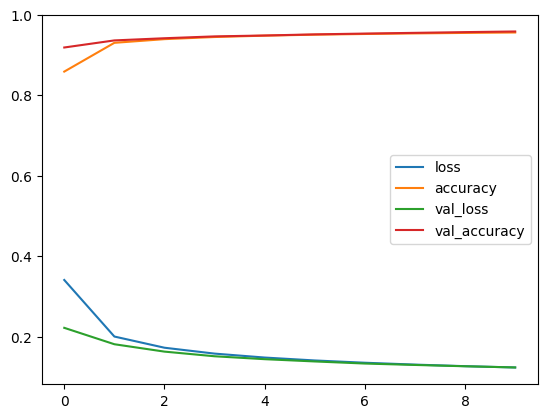

In [55]:
plt.clf()
pd.DataFrame(new_history.history).plot()
plt.show()

## Prediction using trained model

In [60]:
np.argmax(new_model.predict(X_train[:20]),axis=-1)

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0],
      dtype=int64)

## Batch Normalization

> Fast training and getting good accuracy

. Activation function